# Exploratory Data Analysis

### Dataset: World Happiness Report: 2016

### Source: https://www.kaggle.com/unsdsn/world-happiness



#### Importing typical 'Data Wrangling' and 'Data Visualization' libraries.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Importing the csv file

In [8]:
df = pd.read_csv('Happiness_Report_2016_EDA.csv')

In [9]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


In [17]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## Observing the data Region Wise
1) We will first compute total number of regions and their names.

2) We will make another dataframe having columns such as: 'Average Happiness Score', 'Average Happiness Rank', 'Average Social Support', etc.

3) Then, we will plot bargraphs region wise.

In [38]:
#Finding names of different regions

df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [39]:
#Now we want to see how many countries are in different regions

for region in df['Region'].unique():
    print(len(df[df['Region'] == region]), ' : ',region)

21  :  Western Europe
2  :  North America
2  :  Australia and New Zealand
19  :  Middle East and Northern Africa
24  :  Latin America and Caribbean
9  :  Southeastern Asia
29  :  Central and Eastern Europe
6  :  Eastern Asia
38  :  Sub-Saharan Africa
7  :  Southern Asia


In [42]:
#Making a list namely 'rows_list', which will contain dictionary as elements.
#Every dictionary element will be containg elements such as 'Region name', 'Average Freedom', 'Average Social Support', etc.

rows_list = []

for region in df['Region'].unique():
    No_of_countries_RegionWise = len(df[df['Region'] == region])
    Avg_Happ_Rank_RegionWise = df[df['Region'] == region]['Happiness Rank'].sum()/No_of_countries_RegionWise
    Avg_Happ_Score_RegionWise = df[df['Region'] == region]['Happiness Score'].sum()/No_of_countries_RegionWise
    Generosity_RegionWise = df[df['Region'] == region]['Generosity'].sum()/No_of_countries_RegionWise
    Freedom_RegionWise = df[df['Region'] == region]['Freedom'].sum()/No_of_countries_RegionWise
    Health_RegionWise = df[df['Region'] == region]['Health (Life Expectancy)'].sum()/No_of_countries_RegionWise
    Economy_RegionWise = df[df['Region'] == region]['Economy (GDP per Capita)'].sum()/No_of_countries_RegionWise
    Family_RegionWise = df[df['Region'] == region]['Family'].sum()/No_of_countries_RegionWise
    Corr_RegionWise = df[df['Region'] == region]['Trust (Government Corruption)'].sum()/No_of_countries_RegionWise
    
    dict_1 = {'Region': region, 'Number of Countries': No_of_countries_RegionWise, 
              'Average Happiness Score': Avg_Happ_Score_RegionWise, 
              'Average Happiness Rank': Avg_Happ_Rank_RegionWise,
              'Average Generosity': Generosity_RegionWise,
              'Average Freedom': Freedom_RegionWise,
              'Average Health (Life Expectancy)': Health_RegionWise,
              'Average Economy (GDP per Capita)': Economy_RegionWise,
              'Average Social Support': Family_RegionWise,
              'Average Trust (Gov. Corruption)': Corr_RegionWise}
    
    rows_list.append(dict_1)

In [43]:
#Using the above list, forming a dataframe

df_1 = pd.DataFrame(rows_list)

In [44]:
df_1

,Region,Number of Countries,Average Happiness Score,Average Happiness Rank,Average Generosity,Average Freedom,Average Health (Life Expectancy),Average Economy (GDP per Capita),Average Social Support,Average Trust (Gov. Corruption)
0,Western Europe,21,6.685667,29.190476,0.304715,0.477587,0.825754,1.417056,1.042452,0.232544
1,North America,2,7.254000,9.500000,0.429555,0.527665,0.803300,1.474055,1.071960,0.230985
2,Australia and New Zealand,2,7.323500,8.500000,0.484040,0.574920,0.841080,1.402545,1.138770,0.371175
3,Middle East and Northern Africa,19,5.386053,78.105263,0.186749,0.309769,0.616438,1.139323,0.695644,0.161526
4,Latin America and Caribbean,24,6.101750,48.333333,0.208428,0.426646,0.612703,0.993410,0.898432,0.106016
5,Southeastern Asia,9,5.338889,80.000000,0.446150,0.490123,0.561369,0.896381,0.791756,0.148104
6,Central and Eastern Europe,29,5.370690,78.448276,0.170898,0.300528,0.631592,1.047537,0.861855,0.088072
7,Eastern Asia,6,5.624167,67.166667,0.223563,0.387282,0.806680,1.277312,0.910428,0.118347
8,Sub-Saharan Africa,38,4.136421,129.657895,0.226348,0.315424,0.239872,0.474321,0.593656,0.120379
9,Southern Asia,7,4.563286,111.714286,0.343281,0.350026,0.453670,0.660671,0.480694,0.104899


In [45]:
#Finding correlation coefficient with 'Happiness Score'

df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.995743
Generosity                       0.156848
Trust (Government Corruption)    0.402032
Dystopia Residual                0.543738
Freedom                          0.566827
Family                           0.739252
Health (Life Expectancy)         0.765384
Economy (GDP per Capita)         0.790322
Upper Confidence Interval        0.999474
Lower Confidence Interval        0.999485
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

Since correlation coefficient between 'Generosity' and  'Happiness Score' is not that much large, weScore will ignore this.

Since, correlation coeffcient between 'Trust (Gov. Corruption) and 'Happiness Score', 'Freedom' and 'Happiness Score', 'Social Support' and 'Happiness Score', 'Health' and 'Happiness Score', and 'Economy' and 'Happiness Score' is large enough, therefore we will graphically analyse them region wise.

In [46]:
#Plotting multiple Barplots

In [47]:
l = ['Average Trust (Gov. Corruption)', 'Average Freedom', 'Average Social Support','Average Health (Life Expectancy)', 
     'Average Economy (GDP per Capita)', 'Average Happiness Score', 'Average Happiness Rank']

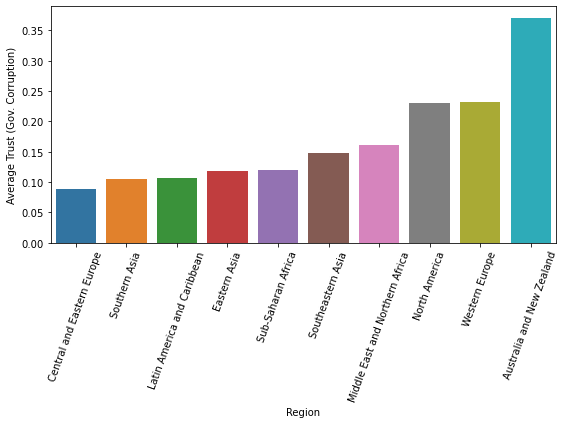

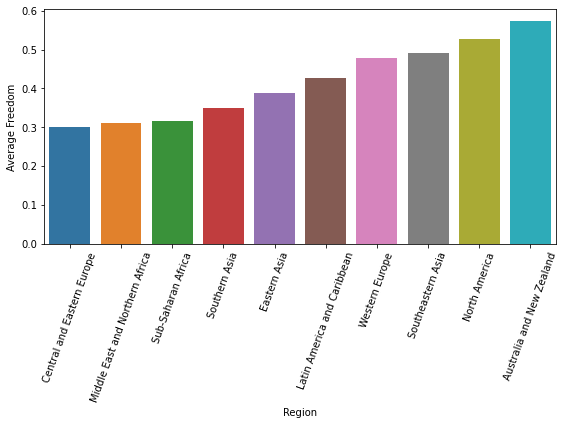

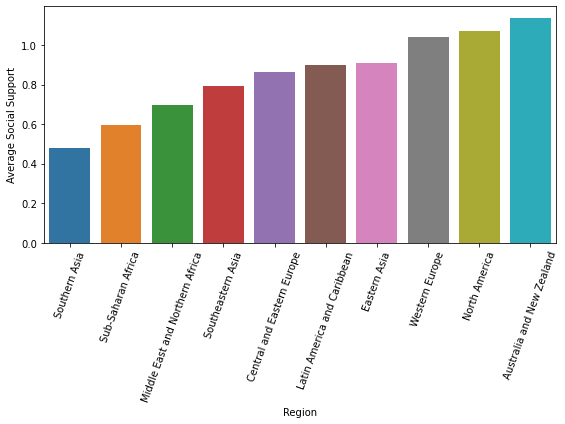

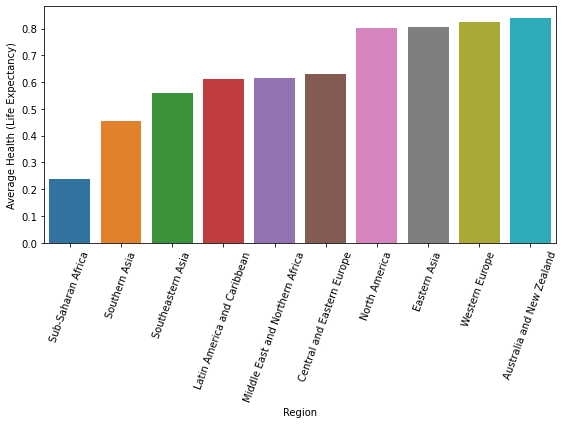

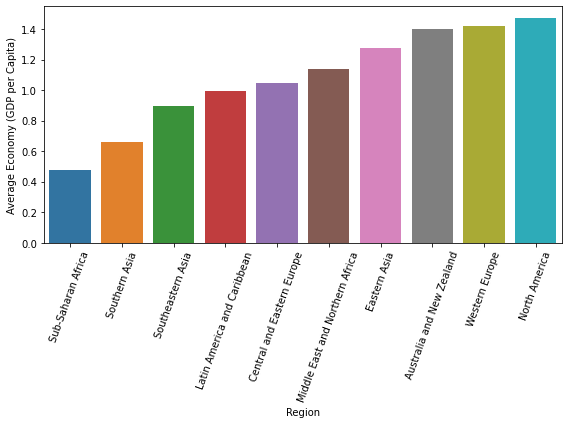

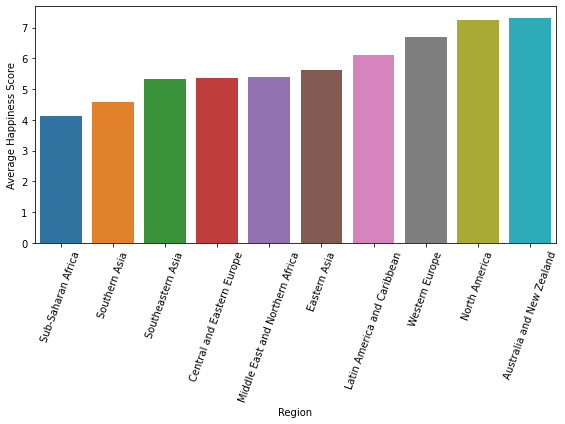

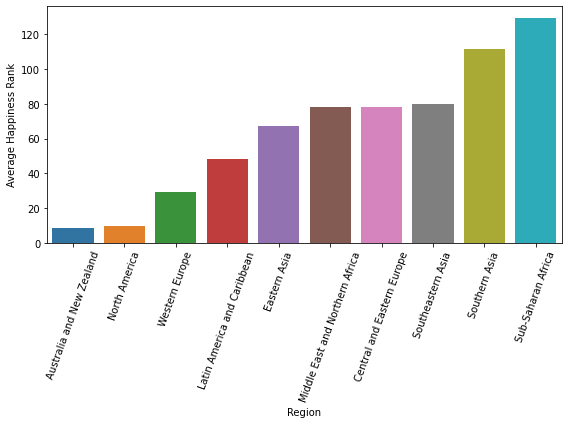

In [50]:
for plot in l:
    plt.figure(figsize=(8,6))
    sns.barplot(x='Region', y=plot, data = df_1.sort_values(by = plot, ascending=True))
    plt.xticks(rotation=70)
    plt.tight_layout()

We can clearly observe that 'Australia and New Zealand' region (consisting of 2 countries) and the region 'Sub- Saharan Africa' (consisting of 38 countries), is the top performer and the least performer in the 'Average Happiness Score' respectively.

We have also plotted Barplots (region wise) including the features with which the correlation coefficient of 'Happiness Score' is large enough. Clearly, the region 'Australia and New Zealand' is also the top performer in all of these features (except the feature 'Average Economy'). Again, 'Southern Asia' (consisting of 7 countries INCLUDIMG 'INDIA') and 'Sub- Saharan Africa' (consisting of 38 countries) region are generally the least performers in majority of them.